In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [4]:
import os
import pickle
from mix_Network import *
dataset = 'poker'

if not os.path.isdir('../Records/EXP_05_OTHERS/'):
    %mkdir '../Records'
    %mkdir '../Records/EXP_05_OTHERS/'

../Records/EXP_05_OTHERS/2020-12-03-mix_hots_pokerfirst5True[4, 8, 16].pkl
Using downloaded and verified file: ../Data/pips_test.tar.gz
Extracting ../Data/pips_test.tar.gz to ../Data/
sensor formatting...



bhatta:100.0% - eucli:100.0% - norm:100.0%


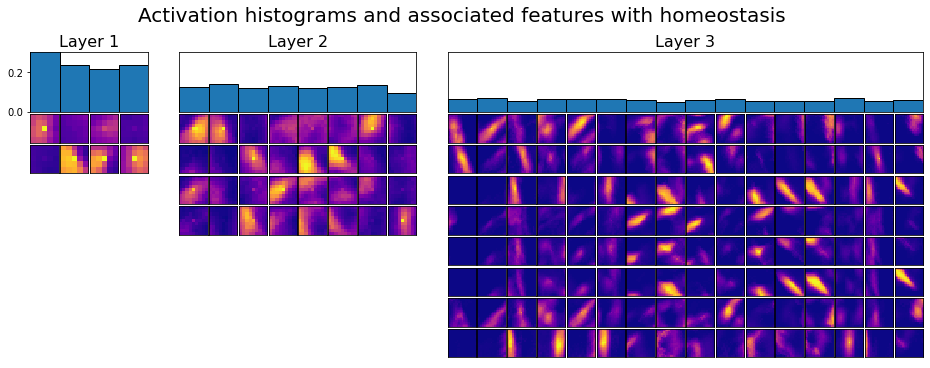

bhatta ->  1.0


In [6]:
tau = 5
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_05_OTHERS/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learning1by1(dataset=dataset)
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order, nb_digit=20)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom, nb_digit=20)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
        
hotshom.plotlayer()
print('bhatta -> ',accuracy(trainmaphom, testmaphom, 'bhatta'))

In [9]:
for dataset in ['ncaltech', 'gesture', 'cars']:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_05_OTHERS/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    print(fname)
    if not os.path.isfile(fname):
        loaderhom, order = hotshom.learning1by1(dataset=dataset)
        trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
        testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
        with open(fname, 'wb') as file:
            pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)

    hotshom.plotlayer()
    print('bhatta -> ',accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_05_OTHERS/2020-12-03-mix_hots_ncaltechfirst5True[4, 8, 16].pkl


Extracting ../Data/Caltech101.zip to ../Data/

sensor formatting...


KeyboardInterrupt: 